### Business Understanding

A Data scientist is given a task of making predictions on the prices of the houses based on he parameters given, I Managed to look at the data that was highly correlated to price which was dependent variable while modelling. Considering many factors that lead to , I figured out how the parameters can lead to prediction of prices.

In [71]:
#import pandas to enable data loading
import pandas as pd
#load data
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


##  DATA UNDERSTANDIG

In [72]:
#check the rows and columns of the data
df.shape

(21597, 21)

#### The data has 21597 rows and 21 columns

In [73]:
#check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### As we can see there are some missing values in waterfront, view and  year of renovation

In [74]:
#find quartiles and mean
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## EXPLORATORY  DATA ANALYSIS

### Data Cleaning

In [75]:
#check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

##### There are missing values for year of renovation, waterfront and view

In [76]:
#Drop all the rows with missing data
df.dropna(axis=0, inplace=True)

In [77]:
#Drop columns with misssing data
df.dropna(axis=1, inplace=True)

In [78]:
#preview data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


In [79]:
#check again if the missing values exist
df.isnull().sum().sort_values(ascending=False)

sqft_lot15       0
view             0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
sqft_living15    0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
id               0
dtype: int64

In [80]:
#checking for duplicates
df.duplicated().sum()

0

#### There are no duplicates in our data

In [81]:
#drop unnecessary columns
df.drop(['id','date','waterfront','view'], axis=1, inplace=True)

In [82]:
#preview the data
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,Average,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,Average,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


## Data Visualization

In [83]:
#import data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

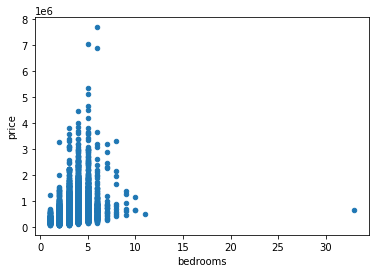

In [84]:
df.plot.scatter(x="bedrooms", y="price")

The relationship between bedrooms and price is not linear

The relationship between sqft_living and p

<AxesSubplot:xlabel='condition', ylabel='price'>

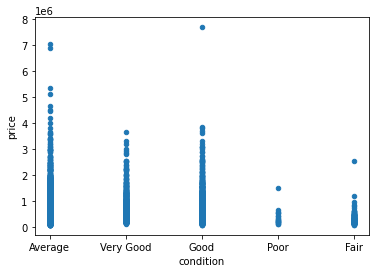

In [86]:
df.plot.scatter(x="condition", y="price")

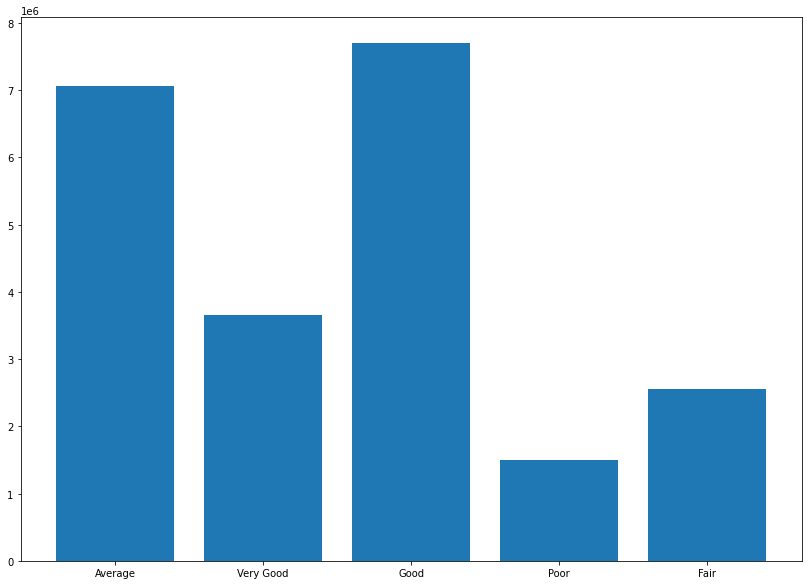

In [87]:
x = df['condition']
y = df['price']

fig, ax = plt.subplots(figsize=(14,10))
plt.bar(x, y)
plt.show()

### As per observation we can see that the better the condition of an house the higher the price

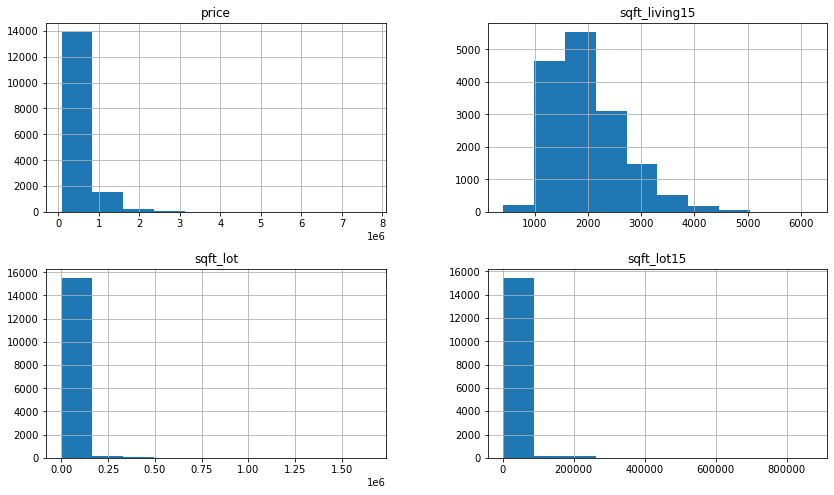

In [88]:
#check for Data distribution
df[['price', 'sqft_living15', 'sqft_lot', 'sqft_lot15' ]]\
    .hist(figsize=(14, 8));

In [89]:
#Transforming to normal distribition
import numpy as np
np.log(df[['price', 'sqft_living15', 'sqft_lot', 'sqft_lot15' ]])

,price,sqft_living15,sqft_lot,sqft_lot15
1,13.195614,7.432484,8.887653,8.941022
3,13.311329,7.215240,8.517193,8.517193
4,13.142166,7.495542,8.997147,8.923058
5,14.022525,8.468003,11.532042,11.532042
6,12.458775,7.713338,8.827468,8.827468
...,...,...,...,...
21591,13.071070,7.192934,7.165493,7.142827
21592,12.793859,7.333023,7.030857,7.319202
21593,12.899220,7.512071,8.667852,8.881836
21594,12.904459,6.927558,7.207860,7.604396


## MODELING

In [90]:
#Check for correlation between price and other parameters
df.corr()['price']

price            1.000000
bedrooms         0.305489
bathrooms        0.526155
sqft_living      0.706189
sqft_lot         0.084504
floors           0.259505
sqft_above       0.612014
yr_built         0.049345
yr_renovated     0.122731
zipcode         -0.049502
lat              0.306607
long             0.021215
sqft_living15    0.581572
sqft_lot15       0.079402
Name: price, dtype: float64

### Simple linear Regression

In [91]:
import statsmodels.api as sm
import statsmodels.formula.api as ols

In [92]:
x = df['sqft_living']
x1 = df['sqft_above']
x2 = df['sqft_living15']
x3 = df['bathrooms']
x4 = df['bedrooms']
y = df['price']

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size=0.2,random_state=100)

In [94]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12609,)
(3153,)
(12609,)
(3153,)


In [95]:
#create model1
model1 = sm.OLS(endog=y_train, exog=sm.add_constant(x_train))
results = model1.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                 1.273e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:28:40   Log-Likelihood:            -1.7529e+05
No. Observations:               12609   AIC:                         3.506e+05
Df Residuals:                   12607   BIC:                         3.506e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.903e+04   5808.992    -10.161      0.000   -7.04e+04   -4.76e+04
sqft_living   288.4325      2.556    112.828      0.000     283.422     293.443
==============================================================================
Omnibus:                     8850.854   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           346743.481
Skew:                           2.894   Prob(JB):                         0.00
Kurtosis:                      28.030   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since the p value < 0.05 then sqft_living is statistically significant, typicalyy this means that a unit increaase in sqft_living will make price to increase by 288.4  and our model is statistically significant because F-statistics has a very low p-value.
R – squared is 0.502 Meaning that 50.2% of the variance in `price` is explained by `sqft_living`. 

##  Performing predictions on the test set

In [96]:
# Add a constant to X_test
x_test_sm = sm.add_constant(x_test)
# Predict the y values corresponding to X_test_sm
y_pred = results.predict(x_test_sm)

In [97]:
print(y_test)

2048     235000.0
12484    440000.0
7235     560000.0
19551    226000.0
9347     370000.0
           ...   
5883     535000.0
17356    390000.0
3306     426000.0
14182    473600.0
4797     410000.0
Name: price, Length: 3153, dtype: float64


In [98]:
y_pred

2048     451499.733010
12484    171720.253924
7235     336126.751944
19551    287093.234990
9347     177488.902977
             ...      
5883     341895.400997
17356    656286.774403
3306     125571.061497
14182    454384.057537
4797     347664.050050
Length: 3153, dtype: float64

In [99]:
#You can see the predicted values with the following code,
y_pred.head()

2048     451499.733010
12484    171720.253924
7235     336126.751944
19551    287093.234990
9347     177488.902977
dtype: float64

### To check how well the values are predicted on the test data we will check some evaluation metrics using sklearn library.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15762 non-null  float64
 1   bedrooms       15762 non-null  int64  
 2   bathrooms      15762 non-null  float64
 3   sqft_living    15762 non-null  int64  
 4   sqft_lot       15762 non-null  int64  
 5   floors         15762 non-null  float64
 6   condition      15762 non-null  object 
 7   grade          15762 non-null  object 
 8   sqft_above     15762 non-null  int64  
 9   sqft_basement  15762 non-null  object 
 10  yr_built       15762 non-null  int64  
 11  yr_renovated   15762 non-null  float64
 12  zipcode        15762 non-null  int64  
 13  lat            15762 non-null  float64
 14  long           15762 non-null  float64
 15  sqft_living15  15762 non-null  int64  
 16  sqft_lot15     15762 non-null  int64  
dtypes: float64(6), int64(8), object(3)
memory usage: 2

In [101]:
#Imporitng libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [103]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

262072.98206919228


In [104]:
print("R-squared: ",r2_score(y_test, y_pred ))

R-squared:  0.48272854915720387


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

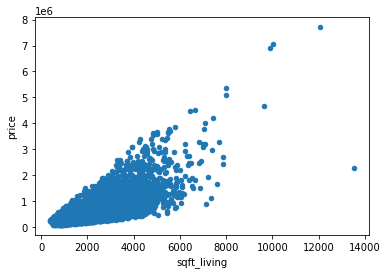

In [110]:
df.plot(x="sqft_living",y="price",kind="scatter")

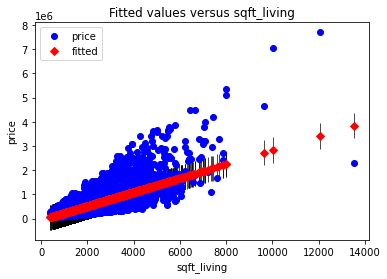

In [111]:
sm.graphics.plot_fit(results,"sqft_living")
plt.show()

In [112]:
#model2
x1 = df['sqft_above']
model2 = sm.OLS(endog=y, exog=sm.add_constant(x1))
results1 = model2.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     9438.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:09:58   Log-Likelihood:            -2.2085e+05
No. Observations:               15762   AIC:                         4.417e+05
Df Residuals:                   15760   BIC:                         4.417e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.831e+04   5590.175      8.642      0.000    3.74e+04    5.93e+04
sqft_above   274.9956      2.831     97.151      0.000     269.447     280.544
==============================================================================
Omnibus:                    12318.520   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           596307.573
Skew:                           3.349   Prob(JB):                         0.00
Kurtosis:                      32.379   Cond. No.                     4.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

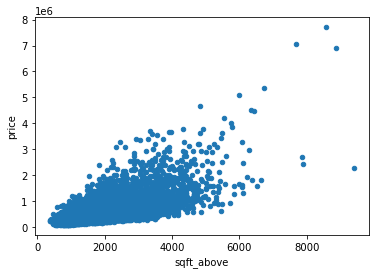

In [113]:
df.plot.scatter("sqft_above", "price")

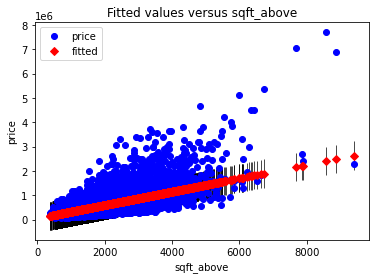

In [114]:
sm.graphics.plot_fit(results1, "sqft_above")
plt.show()

In [117]:
x2 = df['sqft_living15']
model3 = sm.OLS(y, sm.add_constant(x2))
results2 = model3.fit()

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     8055.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:10:30   Log-Likelihood:            -2.2129e+05
No. Observations:               15762   AIC:                         4.426e+05
Df Residuals:                   15760   BIC:                         4.426e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.843e+04   7419.750    -11.918      0.000   -1.03e+05   -7.39e+04
sqft_living15   316.4197      3.526     89.748      0.000     309.509     323.330
==============================================================================
Omnibus:                    15338.018   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1699755.350
Skew:                           4.462   Prob(JB):                         0.00
Kurtosis:                      53.085   Cond. No.                     6.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

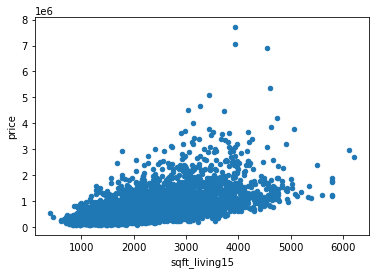

In [115]:
df.plot.scatter("sqft_living15","price")

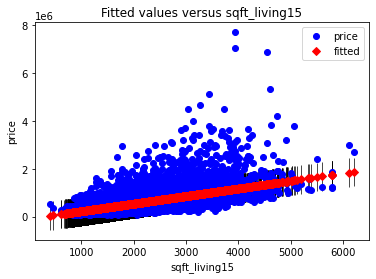

In [118]:
sm.graphics.plot_fit(results2,"sqft_living15")
plt.show()

In [119]:
model4 = sm.OLS(endog=y, exog=sm.add_constant(x3))
results3 = model4.fit()

In [120]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(results3)

(1.016153810761093, 0.23847246842098216)

In [121]:
df_f = df['condition'].value_counts()
df_f

Average      10221
Good          4137
Very Good     1254
Fair           131
Poor            19
Name: condition, dtype: int64

### Performing one hot coding with categoricalm data

In [122]:
#Peforming one hot encoding with pandas
df_origin = df[['grade']].copy()
df_origin.sample(10, random_state=1)

,grade
15377,8 Good
9199,7 Average
20523,8 Good
20016,9 Better
16916,7 Average
21177,9 Better
5514,7 Average
19218,8 Good
13231,8 Good
11822,8 Good


In [123]:
#get dummies
df_origin = pd.get_dummies(df_origin, columns=['grade'])
df_origin

,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
1,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,0
5,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21591,0,0,0,0,0,0,0,0,0,1,0
21592,0,0,0,0,0,0,0,0,0,1,0
21593,0,0,0,0,0,0,0,0,0,1,0
21594,0,0,0,0,0,0,0,0,1,0,0


In [124]:
#create model
model = sm.OLS(y, sm.add_constant(df_origin))
results4 = model.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1674.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:11:05   Log-Likelihood:            -2.1884e+05
No. Observations:               15762   AIC:                         4.377e+05
Df Residuals:                   15751   BIC:                         4.378e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.148e+17   3.11e+17      0.690      0.490   -3.96e+17    8.25e+17
grade_10 Very Good  -2.148e+17   3.11e+17     -0.690      0.490   -8.25e+17    3.96e+17
grade_11 Excellent  -2.148e+17   3.11e+17     -0.690      0.490   -8.25e+17    3.96e+17
grade_12 Luxury     -2.148e+17   3.11e+17     -0.690      0.490   -8.25e+17    3.96e+17
grade_13 Mansion    -2.148e+17   3.11e+17     -0.690      0.490   -8.25e+17    3.96e+17
grade_3 Poor        -2.148e+17   3.11e+17     -0.690      0.490   -8.25e+17    3.96e+17
grade_4 Low         -2.148e+17   3.11e+17     -0.690      0.490   -8.25e+17    3.96e+17
grade_5 Fair        -2.148e+17   3.11e+17     -0.690      0.490   -8.25e+17    3.96e+17
grade_6 Low Average -2.148e+17   3.11e+17     -0.690      0.490   -8.25e+17    3.96e+17
grade_7 Average     -2.148e+17   3.11e+17     -0.690      0.490   -8.25e+17    3.96e+17
grade_8 Good        -2.148e+17   3.11e+17     -0.690      0.490   -8.25e+17    3.96e+17
grade_9 Better      -2.148e+17   3.11e+17     -0.690      0.490   -8.25e+17    3.96e+17
==============================================================================
Omnibus:                    12231.033   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           762183.874
Skew:                           3.218   Prob(JB):                         0.00
Kurtosis:                      36.453   Cond. No.                     5.95e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.78e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Multiple linear Regression

In [125]:
#dropping price because this is our target, then only selecting numeric features
x_all = df.drop("price",axis=1).select_dtypes("number")
x_all

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503
5,4,4.50,5420,101930,1.0,3890,2001,0.0,98053,47.6561,-122.005,4760,101930
6,3,2.25,1715,6819,2.0,1715,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,3,2.50,1310,1294,2.0,1180,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,3,2.50,1530,1131,3.0,1530,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,4,2.50,2310,5813,2.0,2310,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,2,0.75,1020,1350,2.0,1020,2009,0.0,98144,47.5944,-122.299,1020,2007


In [132]:
#drop latititude and longititude
x_all.drop('lat', axis=1, inplace=True)

In [134]:
x_all.drop('long', axis=1,inplace=True)

In [135]:
#create our model
model5 = sm.OLS(y, sm.add_constant(x_all))
#fit model
results5 = model5.fit()

In [136]:
#summary of model5
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     1941.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:31:46   Log-Likelihood:            -2.1780e+05
No. Observations:               15762   AIC:                         4.356e+05
Df Residuals:                   15750   BIC:                         4.357e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.413e+07   4.03e+06     -3.506      0.000    -2.2e+07   -6.23e+06
bedrooms      -6.602e+04   2599.216    -25.399      0.000   -7.11e+04   -6.09e+04
bathrooms      6.841e+04   4574.386     14.955      0.000    5.94e+04    7.74e+04
sqft_living     258.7061      5.875     44.032      0.000     247.190     270.222
sqft_lot         -0.0096      0.067     -0.144      0.886      -0.140       0.121
floors         4.876e+04   5011.626      9.729      0.000    3.89e+04    5.86e+04
sqft_above        3.1679      5.883      0.539      0.590      -8.363      14.699
yr_built      -3383.6105     90.564    -37.362      0.000   -3561.126   -3206.095
yr_renovated     24.5561      5.105      4.810      0.000      14.549      34.563
zipcode         210.3727     40.538      5.190      0.000     130.913     289.832
sqft_living15    87.6393      4.545     19.284      0.000      78.731      96.547
sqft_lot15       -0.6189      0.100     -6.165      0.000      -0.816      -0.422
==============================================================================
Omnibus:                    11620.828   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           585953.864
Skew:                           3.036   Prob(JB):                         0.00
Kurtosis:                      32.246   Cond. No.                     2.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model is statistically significant since the p_value is less than 5%.

The model is statistically significant overall, with an F-statistic p-value well below 0.05

The model explains 57.5% of variance in price.

All of the model coeffients are stastistically significant because they are below 0.05

## FINDINGS

price = -1.413e+07 - 6.602e+04bedrooms + 6.841e+04bathrooms + 258.7061sqft_living - 0.0096sqft_lot	+ 4.876e+04floors + 3.1679sqft_above - 3383.6105yr_built + 24.5561yr_renovated + 210.3727zipcode + 87.6393sqft_living15 - 0.6189sqft_lot15

The new explanatory variable added is statistically significant because adj R-squared increased from 51.5% to 57.5%, this also led to overall increase variance explained by the MODEL
All the coefficients of sqft_living,sqft_living15 and sqft_above has a pvalue of 0 showing that it is statistically significant.
While holding all other variables constant, the addition of a bathroom increases sale price by 24,020 dollars

While holding all other variables constant, the addition of one floor level increases sale price by 41,050 dollars

While holding all other variables constant, improving a home's condition from Average to Very Good increases sale price by 42,180 dollars

While holding all other variables constant, improving a home's grade from Better to High Quality increases sale price by 72,690 dollars

While holding all other variables constant, addition of a basement to a home increases sale price by 40,450 dollars

While holding all other variables constant, increasing the sqft_living of a home increases sale price by 63.75 dollars

While holding all other variables constant, having a waterfront in a home increases sale price by 10,740 dollars

## Recommendation

Home owners should renovate their homes by increasing the sqft_living since an increase per inch raises the value by 63.75 dollars. Lets assume theres a 1000 inch increase, theres an estimated increase in value by 63,750 dollars.

Home owners should also increase the number of bedroms,have a basement,have a waterfront, improve condition to very good,add additional floors and improve the grade to high quality in order to maximise value of their homes before listing.